# Modelo Keras Secuencial


*   5 capas ocultas densas de 500, 1000, 1000, 2000, 2000 unidades
*   Activación LeakyReLU(alpha=0.1)
*   Loss MSE
*   Métrica MAE
*   SGD Learning Rate 1e-2 Momentum 0.0
*   2000 epochs
*   Reentrenamiento 1e-4, 25 epochs



In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import LeakyReLU
from keras import backend as K
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.model_selection import train_test_split
from datetime import datetime

PATH = r'/content/drive/My Drive/Colab Notebooks/'
PATH_MODELS= r'/content/drive/My Drive/Colab Notebooks/models/'
DATA_INPUT_FILE= r'data_h2o_HF_ccpvdz.csv'
OUTPUT_FILES = r'seq_3cv26'

# Carga de datos
17636 registros

In [4]:
data= pd.read_csv(PATH + DATA_INPUT_FILE, index_col= 0)
data.describe()

,rh1,rh2,ang,energia
count,17636.000000,17636.000000,17636.000000,17636.000000
mean,1.718462,1.718462,104.482706,-75.741635
std,0.465277,0.465277,4.329904,0.428579
min,0.800000,0.800000,94.500000,-76.027388
25%,1.400000,1.400000,102.500000,-75.992674
50%,1.708000,1.708000,104.500000,-75.924886
75%,2.025000,2.025000,106.500000,-75.722473
max,2.800000,2.800000,114.500000,-72.066162


# Transformación de las variables para el entrenamiento
*   x_input: Se normalizan las variables predictoras
*   y_input: Se le resta el mínimo a la variable objetivo


In [5]:
#Se normalizan las variables predictoras
x = data[['ang', 'rh1', 'rh2']].copy()
x_describe= x.describe()
x_stats = x_describe.transpose()
x_input = (x - x_stats['mean']) / x_stats['std']

# Se le resta el mínimo a la variable objetivo
minimo=min(data['energia'])
y_input = data['energia'].copy() -minimo


# Creación de los conjuntos de train y validación
Conjunto de validación del 10%

In [6]:
x_train, x_valid, y_train, y_valid = train_test_split(x_input, y_input , random_state = 33, test_size = 0.1)

# Definición de la arquitectura

In [ ]:
#Modelo
model = keras.Sequential([
    layers.Dense(500, activation=LeakyReLU(alpha=0.1), input_shape=[len(x_train.keys())]),
    layers.Dense(1000, activation=LeakyReLU(alpha=0.1)),
    layers.Dense(1000, activation=LeakyReLU(alpha=0.1)),
    layers.Dense(2000, activation=LeakyReLU(alpha=0.1)),
    layers.Dense(2000, activation=LeakyReLU(alpha=0.1)),
    layers.Dense(1)
  ])

#Optimizador 
optimizer = keras.optimizers.SGD(learning_rate=1e-2)

model.compile( loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mean_squared_logarithmic_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               2000      
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              501000    
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              2002000   
_________________________________________________________________
dense_4 (Dense)              (None, 2000)              4002000   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2001      
Total params: 7,510,001
Trainable params: 7,510,001
Non-trainable params: 0
______________________________________________

# Callback

In [ ]:
#Se guarda el mejor modelo según la métrica de referencia MAE
callback_mejor_modelo = tf.keras.callbacks.ModelCheckpoint(
    filepath= PATH_MODELS + OUTPUT_FILES + r'_best.h5',
    monitor='val_mae',
    mode='min',
    save_best_only=True)

# Entrenamiento

In [ ]:
EPOCHS = 2000

datetime_comienzo = datetime.now()

#Entrenamiento
history = model.fit(
  x_train, y_train, verbose=0, 
  epochs=EPOCHS, validation_data=(x_valid, y_valid)
  ,callbacks=[callback_mejor_modelo])

datetime_fin = datetime.now()

#Se guarda el modelo
model.save(PATH_MODELS + OUTPUT_FILES + r'.h5',include_optimizer=True, save_format='h5')

print("Tiempo de entrenamiento:" + str(datetime_fin-datetime_comienzo) )

#Historia de entrenamiento a dataframe
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.to_csv(PATH_MODELS + 'hist' + OUTPUT_FILES + r'.h5',index=True)
hist.tail(5) 

Tiempo de entrenamiento:0:33:24.891686


,loss,mae,mean_squared_logarithmic_error,val_loss,val_mae,val_mean_squared_logarithmic_error,epoch
1995,0.000307,0.002352,0.000045,0.000021,0.002216,0.000007,1995
1996,0.000320,0.002586,0.000045,0.000014,0.001890,0.000005,1996
1997,0.000316,0.002299,0.000045,0.000011,0.001467,0.000004,1997
1998,0.000311,0.002491,0.000044,0.000012,0.001395,0.000005,1998
1999,0.000313,0.002377,0.000045,0.000010,0.001308,0.000005,1999


# Representación entrenamiento 

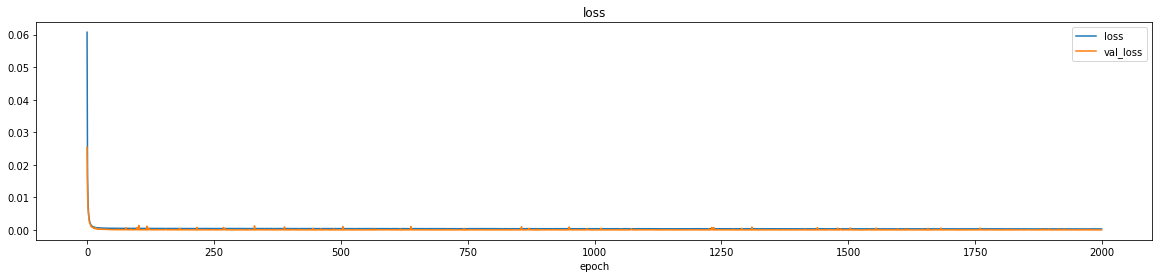

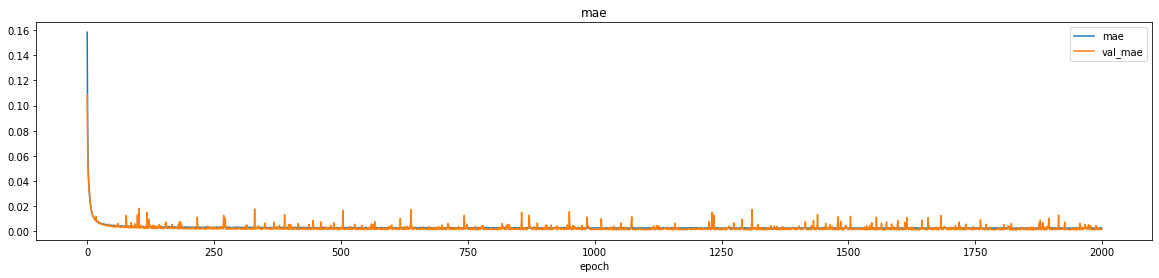

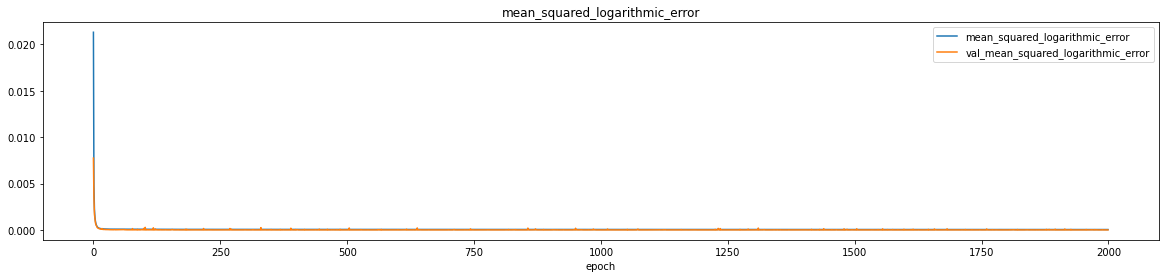

In [ ]:
hist.plot(x='epoch', y=['loss', 'val_loss'], title='loss', figsize=(20,4))
hist.plot(x='epoch', y=['mae', 'val_mae'], title='mae', figsize=(20,4))
hist.plot(x='epoch', y=['mean_squared_logarithmic_error', 'val_mean_squared_logarithmic_error'], title='mean_squared_logarithmic_error', figsize=(20,4))

# Representación entrenamiento 
A partir del epoch 200 para aumentar escala vertical

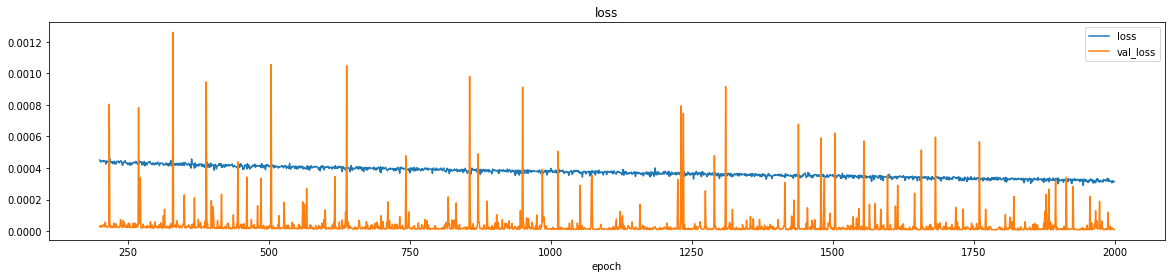

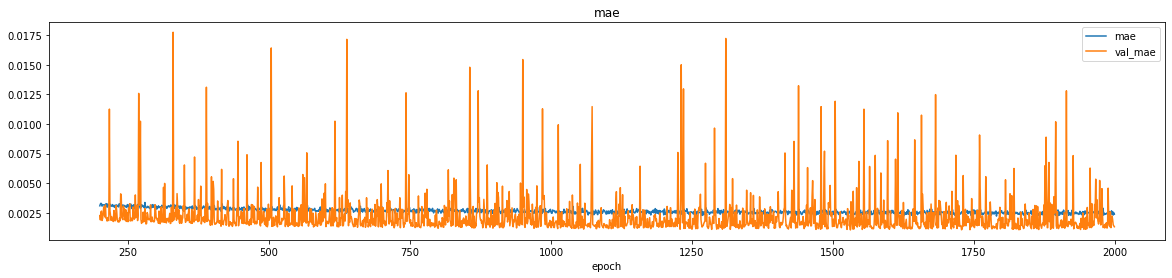

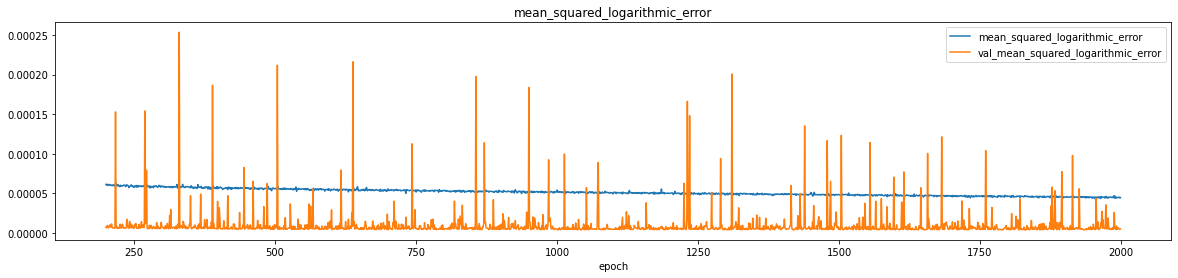

In [ ]:
hist_mayor_200= hist[(hist['epoch']>=200)]
hist_mayor_200.plot(x='epoch', y=['loss', 'val_loss'], title='loss', figsize=(20,4))
hist_mayor_200.plot(x='epoch', y=['mae', 'val_mae'], title='mae', figsize=(20,4))
hist_mayor_200.plot(x='epoch', y=['mean_squared_logarithmic_error', 'val_mean_squared_logarithmic_error'], title='mean_squared_logarithmic_error', figsize=(20,4))

# Mejores épocas

In [ ]:

indice_min_loss =hist['val_loss'].idxmin()
indice_min_mae =hist['val_mae'].idxmin()
indice_min_msle =hist['val_mean_squared_logarithmic_error'].idxmin()

print('Loss (MSE) mínimo: epoch {} valor {:.3E}'.format(hist['epoch'][indice_min_loss],hist['val_loss'][indice_min_loss]))
print('MAE mínimo: epoch {} valor {:.3E}'.format(hist['epoch'][indice_min_mae],hist['val_mae'][indice_min_mae]))
print('MSLE mínimo: epoch {} valor {:.3E}'.format(hist['epoch'][indice_min_msle],hist['val_mean_squared_logarithmic_error'][indice_min_msle]))


Loss (MSE) mínimo: epoch 1830 valor 7.867E-06
MAE mínimo: epoch 1531 valor 1.042E-03
MSLE mínimo: epoch 1935 valor 3.792E-06


# Cargamos el mejor modelo
Y comprobamos que la evaluación corresponde a la mejor época de la métrica de referencia MAE

In [7]:
# Se toma el seq_3cv21_best para no tener que ejecutar todo de nuevo
model_best = keras.models.load_model(PATH_MODELS +  r'seq_3cv22_best.h5',
                                      custom_objects = {"LeakyReLU": LeakyReLU})
model_best.evaluate(x_valid, y_valid, verbose=2)

56/56 - 0s - loss: 9.1313e-06 - mean_absolute_error: 0.0010 - mean_squared_logarithmic_error: 4.0921e-06


[9.131341357715428e-06, 0.001041558338329196, 4.0920676838140935e-06]

# Reentrenamiento

In [8]:
EPOCHS = 25

model_reen = model_best
K.set_value(model_reen.optimizer.learning_rate, 1e-4)

#Se guarda el mejor modelo según la métrica de referencia MAE
callback_mejor_modelo_reen = tf.keras.callbacks.ModelCheckpoint(
    filepath= PATH_MODELS + OUTPUT_FILES + r'_reen_best.h5',
    monitor='val_mean_absolute_error',
    mode='min',
    save_best_only=True)

datetime_comienzo = datetime.now()

#Entrenamiento
history_reen = model_reen.fit(
  x_train, y_train, verbose=0, 
  epochs=EPOCHS, validation_data=(x_valid, y_valid)
  ,callbacks=[callback_mejor_modelo_reen])

datetime_fin = datetime.now()

#Se guarda el modelo
model_reen.save(PATH_MODELS + OUTPUT_FILES + r'_reen.h5',include_optimizer=True, save_format='h5')

print("Tiempo de entrenamiento:" + str(datetime_fin-datetime_comienzo) )

#Historia de entrenamiento a dataframe
hist_reen = pd.DataFrame(history_reen.history)
hist_reen['epoch'] = history_reen.epoch
hist_reen.to_csv(PATH_MODELS + 'hist' + OUTPUT_FILES + r'_reen.h5',index=True)
hist_reen.tail(5)

Tiempo de entrenamiento:0:00:28.272408


,loss,mean_absolute_error,mean_squared_logarithmic_error,val_loss,val_mean_absolute_error,val_mean_squared_logarithmic_error,epoch
20,0.000309,0.001431,0.000042,0.000009,0.001040,0.000004,20
21,0.000309,0.001426,0.000042,0.000009,0.001041,0.000004,21
22,0.000309,0.001425,0.000042,0.000009,0.001038,0.000004,22
23,0.000309,0.001433,0.000042,0.000009,0.001037,0.000004,23
24,0.000309,0.001424,0.000042,0.000009,0.001037,0.000004,24


In [9]:
model_reen_best = keras.models.load_model(PATH_MODELS + OUTPUT_FILES + r'_reen_best.h5',
                                      custom_objects = {"LeakyReLU": LeakyReLU})
model_reen_best.evaluate(x_valid, y_valid, verbose=2)

56/56 - 0s - loss: 9.2066e-06 - mean_absolute_error: 0.0010 - mean_squared_logarithmic_error: 4.1447e-06


[9.206595677824225e-06, 0.0010373924160376191, 4.144674676354043e-06]

# Test del modelo con dataset independiente

In [11]:
data_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/output_plotdata_ccpvdz_HF_test.csv")

y_test = data_test.pop("energia")
x_test = data_test

y_test_input = y_test - minimo
x_test_input = (x_test - x_stats['mean']) / x_stats['std']

model_reen_best.evaluate(x_test_input, y_test_input, verbose=2)

50/50 - 0s - loss: 4.7189e-04 - mean_absolute_error: 0.0015 - mean_squared_logarithmic_error: 2.3288e-04


[0.00047189046745188534, 0.001544371247291565, 0.00023287779185920954]

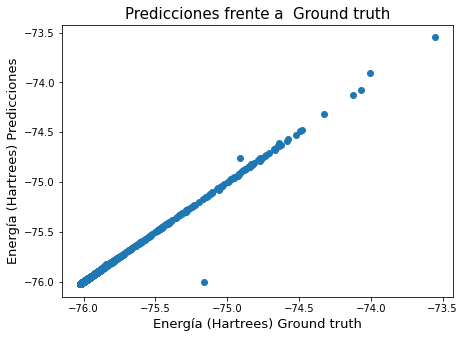

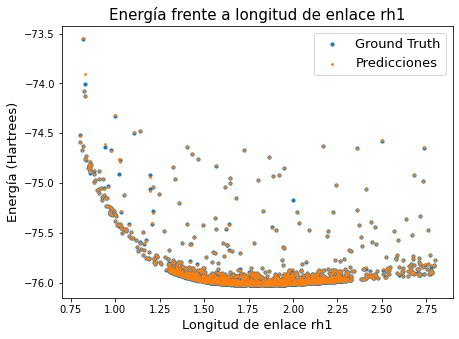

In [12]:
test_predictions = model_reen_best.predict(x_test_input).flatten() 

fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(y_test, test_predictions + minimo)
ax.set_title('Predicciones frente a  Ground truth', fontsize=15)
ax.set_xlabel('Energía (Hartrees) Ground truth', fontsize=13)
ax.set_ylabel('Energía (Hartrees) Predicciones', fontsize=13)

fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x_test['rh1'], y_test, label='Ground Truth', s=10)
ax.scatter(x_test['rh1'], test_predictions + minimo, label='Predicciones', s=3)
ax.set_title('Energía frente a longitud de enlace rh1', fontsize=15)
ax.set_xlabel('Longitud de enlace rh1', fontsize=13)
ax.set_ylabel('Energía (Hartrees)', fontsize=13)
ax.legend(fontsize=13)
plt.show()

# Energía frente a una distancia de enlace
Fijando la otra distancia de enlace a 1.808 ua y el ángulo a 104.5 grados

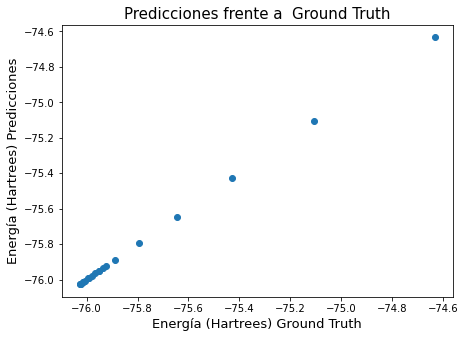

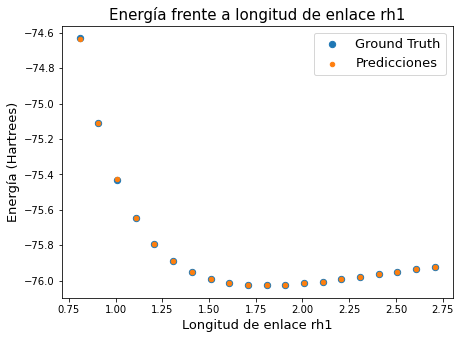

In [13]:
x_long_enlace = data[(np.round(data["ang"],1)==104.5) & (np.round(data["rh2"],3)==1.808)].copy()
y_long_enlace =x_long_enlace.pop("energia")
x_long_enlace_input = (x_long_enlace - x_stats['mean']) / x_stats['std']

test_predictions_long_enlace = model_reen_best.predict(x_long_enlace_input).flatten()
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(y_long_enlace, test_predictions_long_enlace + minimo)
ax.set_title('Predicciones frente a  Ground Truth', fontsize=15)
ax.set_xlabel('Energía (Hartrees) Ground Truth', fontsize=13)
ax.set_ylabel('Energía (Hartrees) Predicciones', fontsize=13)


fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x_long_enlace['rh1'], y_long_enlace, label='Ground Truth', s=40)
ax.scatter(x_long_enlace['rh1'], test_predictions_long_enlace + minimo, label='Predicciones', s=20)
ax.set_title('Energía frente a longitud de enlace rh1', fontsize=15)
ax.set_xlabel('Longitud de enlace rh1', fontsize=13)
ax.set_ylabel('Energía (Hartrees)', fontsize=13)
ax.legend(fontsize=13)
plt.show()




plt.show()

# Energía frente al ángulo
Fijando las dos distancias de enelace a 1.808

Ángulo en el vértice de la parábola: 105.24


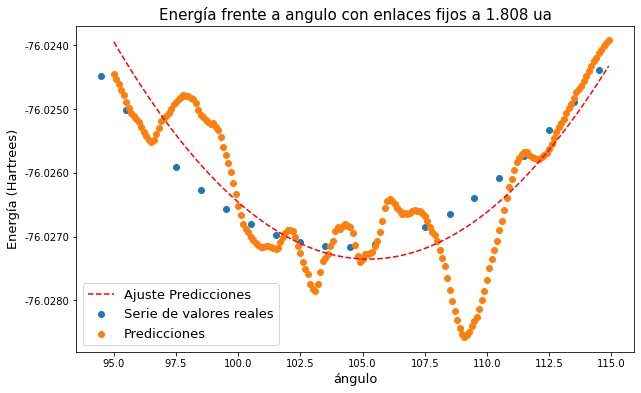

In [14]:
x_data_ang = data[(np.round(data['rh1'],3)==1.808) & (np.round(data['rh2'],3)==1.808)].copy()
y_data_ang =x_data_ang.pop("energia")

x_arange = pd.DataFrame()
x_arange['ang']= np.arange(95, 115, 0.1)
x_arange['rh1'] =1.808
x_arange['rh2'] =1.808
x_arange_input = (x_arange - x_stats['mean']) / x_stats['std']
test_predictions_arrange_ang = model_reen_best.predict(x_arange_input).flatten()

z = np.polyfit(x_arange['ang'], test_predictions_arrange_ang + minimo, 2)
p = np.poly1d(z)
ang_vertice = -p.coefficients[1]/(2*p.coefficients[0])
print('Ángulo en el vértice de la parábola: {:.2f}'.format(ang_vertice))


fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(x_data_ang['ang'], y_data_ang , label='Serie de valores reales')
ax.scatter(x_arange['ang'], test_predictions_arrange_ang + minimo, label='Predicciones')
ax.plot(x_arange['ang'],p(x_arange['ang']),"r--", label= 'Ajuste Predicciones')
ax.set_title('Energía frente a angulo con enlaces fijos a 1.808 ua', fontsize=15)
ax.set_xlabel('ángulo', fontsize=13)
ax.set_ylabel('Energía (Hartrees)', fontsize=13)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax.legend(fontsize=13)

plt.show()



Fijando las dos distancias de enelace a 1.708



Ángulo en el vértice de la parábola: 107.28


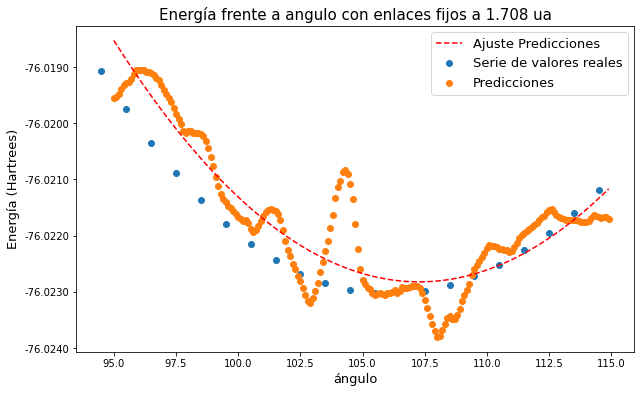

In [15]:
x_data_ang = data[(np.round(data['rh1'],3)==1.708) & (np.round(data['rh2'],3)==1.708)].copy()
y_data_ang =x_data_ang.pop("energia")

x_arange = pd.DataFrame()
x_arange['ang']= np.arange(95, 115, 0.1)
x_arange['rh1'] =1.708
x_arange['rh2'] =1.708
x_arange_input = (x_arange - x_stats['mean']) / x_stats['std']
test_predictions_arrange_ang = model_reen_best.predict(x_arange_input).flatten()

z = np.polyfit(x_arange['ang'], test_predictions_arrange_ang + minimo, 2)
p = np.poly1d(z)
ang_vertice = -p.coefficients[1]/(2*p.coefficients[0])
print('Ángulo en el vértice de la parábola: {:.2f}'.format(ang_vertice))


fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(x_data_ang['ang'], y_data_ang , label='Serie de valores reales')
ax.scatter(x_arange['ang'], test_predictions_arrange_ang + minimo, label='Predicciones')
ax.plot(x_arange['ang'],p(x_arange['ang']),"r--", label= 'Ajuste Predicciones')
ax.set_title('Energía frente a angulo con enlaces fijos a 1.708 ua', fontsize=15)
ax.set_xlabel('ángulo', fontsize=13)
ax.set_ylabel('Energía (Hartrees)', fontsize=13)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax.legend(fontsize=13)

plt.show()